In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [12]:
# Load the CSV file again
file_path = '../output/library_comparison_results.csv'
df = pd.read_csv(file_path)

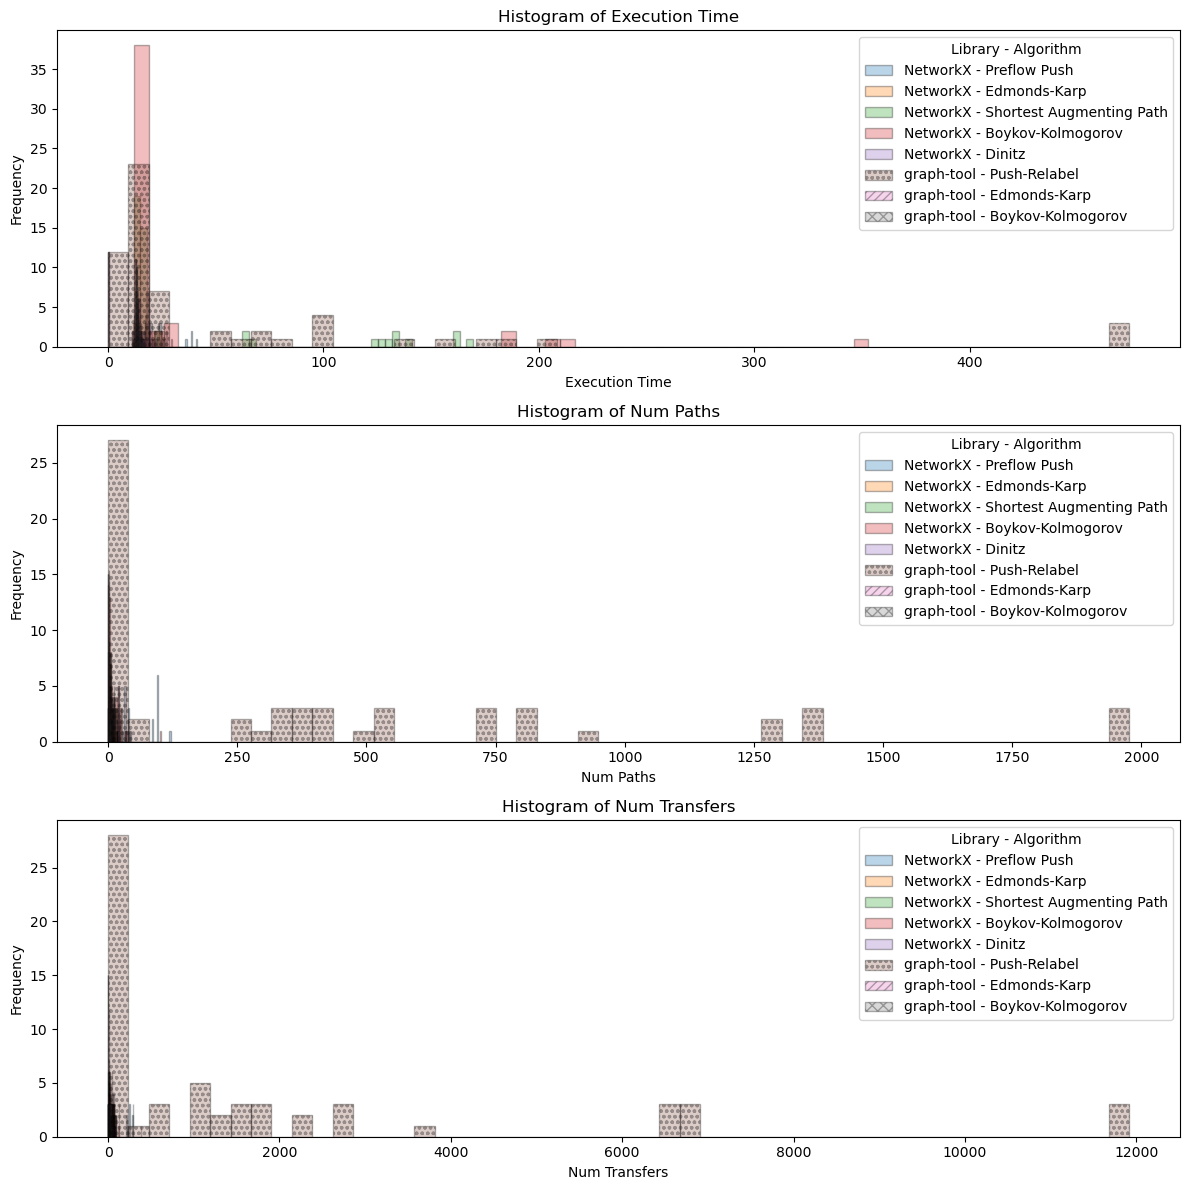

In [30]:
# Create a new column combining Library and Algorithm for labeling
df['Library_Algorithm'] = df['Library'] + ' - ' + df['Algorithm']

colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors for more contrast

colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors for more contrast
hatches = ['////', 'xxx', 'ooo']  # Patterns for graph-tool library

# Plot histograms for Execution Time, Num Paths, and Num Transfers with the combined Library+Algorithm labels
metrics = ['Execution Time', 'Num Paths', 'Num Transfers']
plt.figure(figsize=(12, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    for j, label in enumerate(df['Library_Algorithm'].unique()):
        subset = df[df['Library_Algorithm'] == label]
        color = colors[j % len(colors)]
        if 'graph-tool' in label:
            plt.hist(subset[metric], bins=50, alpha=0.3, label=label, color=color, edgecolor='black', hatch=hatches[j % len(hatches)])
        else:
            plt.hist(subset[metric], bins=50, alpha=0.3, label=label, color=color, edgecolor='black')
    
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend(title='Library - Algorithm')

plt.tight_layout()
plt.show()


In [34]:
df.groupby('Library_Algorithm')[['Execution Time', 'Num Transfers']].describe()

Execution Time                         \
                                             count       mean         std   
Library_Algorithm                                                           
NetworkX - Boykov-Kolmogorov                  48.0  38.287665   68.481001   
NetworkX - Dinitz                             48.0  15.230948    2.931854   
NetworkX - Edmonds-Karp                       48.0  13.956657    1.999762   
NetworkX - Preflow Push                       48.0  21.932350    6.346131   
NetworkX - Shortest Augmenting Path           48.0  42.294458   50.804696   
graph-tool - Boykov-Kolmogorov                60.0  10.753976    5.457676   
graph-tool - Edmonds-Karp                     60.0  11.129894    5.690757   
graph-tool - Push-Relabel                     60.0  59.229178  107.136061   

                                                                      \
                                           min        25%        50%   
Library_Algorithm                                                      
NetworkX - Boykov-Kolmogorov         12.254120  13.682567  15.232872   
NetworkX - Dinitz                    11.319988  13.297984  14.386828   
NetworkX - Edmonds-Karp              11.011669  12.786216  13.456978   
NetworkX - Preflow Push              11.156602  18.220788  20.197679   
NetworkX - Shortest Augmenting Path  11.856083  14.385691  15.409595   
graph-tool - Boykov-Kolmogorov        0.000014  12.716599  13.063605   
graph-tool - Edmonds-Karp             0.000015  12.756052  13.365529   
graph-tool - Push-Relabel             0.000015  13.292469  15.155445   

                                                           Num Transfers  \
                                           75%         max         count   
Library_Algorithm                                                          
NetworkX - Boykov-Kolmogorov         17.830985  353.015516          48.0   
NetworkX - Dinitz                    17.009097   24.301644          48.0   
NetworkX - Edmonds-Karp              14.593401   20.355064          48.0   
NetworkX - Preflow Push              24.020522   41.311464          48.0   
NetworkX - Shortest Augmenting Path  34.011657  169.560836          48.0   
graph-tool - Boykov-Kolmogorov       13.715862   16.047837          60.0   
graph-tool - Edmonds-Karp            14.345970   17.511850          60.0   
graph-tool - Push-Relabel            63.729454  473.999202          60.0   

                                                                           \
                                            mean          std  min    25%   
Library_Algorithm                                                           
NetworkX - Boykov-Kolmogorov           33.062500    28.798202  0.0  11.50   
NetworkX - Dinitz                      32.041667    21.328194  0.0  15.00   
NetworkX - Edmonds-Karp                31.791667    21.971895  0.0  14.75   
NetworkX - Preflow Push                97.270833   107.882864  0.0  16.00   
NetworkX - Shortest Augmenting Path    34.833333    23.225384  0.0  15.00   
graph-tool - Boykov-Kolmogorov         24.116667    24.837159  0.0   3.75   
graph-tool - Edmonds-Karp              27.866667    25.042653  0.0  10.50   
graph-tool - Push-Relabel            1887.666667  3055.916821  0.0  11.25   

                                                              
                                       50%      75%      max  
Library_Algorithm                                             
NetworkX - Boykov-Kolmogorov          17.5    54.25    122.0  
NetworkX - Dinitz                     28.0    42.75     85.0  
NetworkX - Edmonds-Karp               27.0    45.25     80.0  
NetworkX - Preflow Push               55.5   151.75    387.0  
NetworkX - Shortest Augmenting Path   27.0    46.25     89.0  
graph-tool - Boykov-Kolmogorov        17.0    35.75     91.0  
graph-tool - Edmonds-Karp             22.0    40.75     89.0  
graph-tool - Push-Relabel            510.0  1893.75  11915.0